In [160]:
#import libraries

import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [164]:
#load data

#result = pyreadr.read_r('/Users/dangngochuy/Desktop/polls_btw.RData')
polls = pd.read_csv("polls_btw.csv", index_col='date', parse_dates=True)
polls.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
1951-04-15,1953.0,NaN,allensbach,oth,24.0,1953-09-06,875.0
1950-11-15,1953.0,NaN,allensbach,gru,NaN,1953-09-06,1026.0
1952-12-15,1953.0,NaN,allensbach,spd,35.0,1953-09-06,265.0
1953-02-15,1953.0,NaN,allensbach,spd,33.0,1953-09-06,203.0
1951-03-15,1953.0,NaN,allensbach,gru,NaN,1953-09-06,906.0


In [131]:
#see sample of the data

#polls = result["polls_df"]
polls.head()

,election,sample_size,institute,date,party,support,election_date,days_to_election
0,1953.0,NaN,allensbach,1951-04-15,oth,24.0,1953-09-06,875.0
1,1953.0,NaN,allensbach,1950-11-15,gru,NaN,1953-09-06,1026.0
2,1953.0,NaN,allensbach,1952-12-15,spd,35.0,1953-09-06,265.0
3,1953.0,NaN,allensbach,1953-02-15,spd,33.0,1953-09-06,203.0
4,1953.0,NaN,allensbach,1951-03-15,gru,NaN,1953-09-06,906.0


In [165]:
#Impute sample_size with 1000 for missing values

polls["sample_size"].fillna(1000, inplace=True)
polls.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
1951-04-15,1953.0,1000.0,allensbach,oth,24.0,1953-09-06,875.0
1950-11-15,1953.0,1000.0,allensbach,gru,NaN,1953-09-06,1026.0
1952-12-15,1953.0,1000.0,allensbach,spd,35.0,1953-09-06,265.0
1953-02-15,1953.0,1000.0,allensbach,spd,33.0,1953-09-06,203.0
1951-03-15,1953.0,1000.0,allensbach,gru,NaN,1953-09-06,906.0


In [133]:
#transform date column to datetime format in pandas
#time_format = '%Y-%m-%d'

#polls['date'] =  pd.to_datetime(polls['date'], format= time_format)
#polls.set_index('date', inplace = True)

In [166]:
#see how many unique polling institutions there are

polls['institute'].unique()

array(['allensbach', 'fgruppe_wahlen', 'forsa', 'emnid',
       'infratest_dimap', 'gms', 'insa'], dtype=object)

In [167]:
#see how many unique parties there are in the polls

polls['party'].unique()

array(['oth', 'gru', 'spd', 'cdu', 'lin', 'fdp', 'afd'], dtype=object)

In [168]:
#create data frame with polls from each institutions in 2017 

election2017_allen = polls.loc[(polls['institute'] == 'allensbach') & (polls['election'] == 2017)]
election2017_insa = polls.loc[(polls['institute'] == 'insa') & (polls['election'] == 2017)]
election2017_forsa = polls.loc[(polls['institute'] == 'forsa') & (polls['election'] == 2017)]
election2017_emnid = polls.loc[(polls['institute'] == 'emnid') & (polls['election'] == 2017)]
election2017_gms = polls.loc[(polls['institute'] == 'gms') & (polls['election'] == 2017)]
election2017_infra = polls.loc[(polls['institute'] == 'infratest_dimap') & (polls['election'] == 2017)]
election2017_fgruppe = polls.loc[(polls['institute'] == 'fgruppe_wahlen') & (polls['election'] == 2017)]

In [169]:
election2017_insa_spd = election2017_insa.loc[election2017_insa['party'] == 'spd']
election2017_insa_spd.head()


,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
2017-02-02,2017.0,1000.0,insa,spd,27.0,2017-09-24,234.0
2016-12-13,2017.0,1455.0,insa,spd,21.5,2017-09-24,285.0
2016-03-29,2017.0,1873.0,insa,spd,20.0,2017-09-24,544.0
2016-05-23,2017.0,2022.0,insa,spd,19.5,2017-09-24,489.0
2017-03-07,2017.0,2022.0,insa,spd,31.5,2017-09-24,201.0


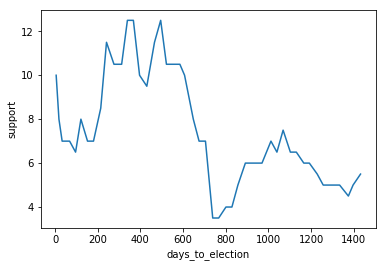

In [170]:
election2017allen = polls.loc[(polls['institute'] == 'allensbach') & (polls['election'] == 2017)]
election2017allen_afd = election2017allen.loc[election2017allen['party'] == 'afd']
plot_test_allen_afd = sns.lineplot(x="days_to_election", y="support", data=election2017allen_afd)

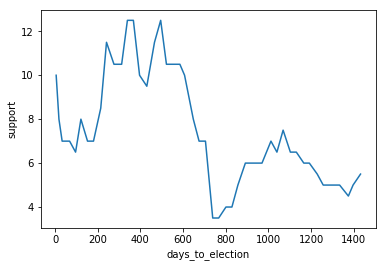

In [171]:
plot_test_allen_afd = sns.lineplot(x="days_to_election", y="support", data=election2017allen_afd.sort_values("days_to_election"))

In [172]:
election2017_forsa = polls.loc[(polls['institute'] == 'forsa') & (polls['election'] == 2017)]
election2017_forsa_spd = election2017_forsa.loc[election2017_forsa['party'] == 'spd']
election2017_forsa_spd['date'].nunique()
plot_forsa_spd = sns.lineplot(x="days_to_election", y="support", data=election2017_forsa_spd)

KeyError: 'date'

In [173]:
election2017_emnid = polls.loc[(polls['institute'] == 'emnid') & (polls['election'] == 2017)]
election2017_emnid_spd = election2017_emnid.loc[election2017_emnid['party'] == 'spd']
election2017_emnid_spd['date'].nunique()
plot_emnid_spd = sns.lineplot(x="days_to_election", y="support", data=election2017_emnid_spd)

KeyError: 'date'

In [174]:
election2017_gms = polls.loc[(polls['institute'] == 'gms') & (polls['election'] == 2017)]
election2017_gms_spd = election2017_gms.loc[election2017_gms['party'] == 'spd']
election2017_gms_spd['date'].nunique()
plot_gms_spd = sns.lineplot(x="days_to_election", y="support", data=election2017_gms_spd)

KeyError: 'date'

In [176]:
election2017_fgruppe = polls.loc[(polls['institute'] == 'fgruppe_wahlen') & (polls['election'] == 2017)]
election2017_fgruppe_spd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'spd']
election2017_fgruppe_spd['date'].nunique()
plot_fgruppe_spd = sns.lineplot(x="days_to_election", y="support", data=election2017_fgruppe_spd)

KeyError: 'date'

In [177]:
election2017_infra = polls.loc[(polls['institute'] == 'infratest_dimap') & (polls['election'] == 2017)]
election2017_infra_spd = election2017_infra.loc[election2017_infra['party'] == 'spd']
election2017_infra_spd['date'].nunique()
plot_infra_spd = sns.lineplot(x="days_to_election", y="support", data=election2017_infra_spd)

KeyError: 'date'

NameError: name 'election2017_spd' is not defined

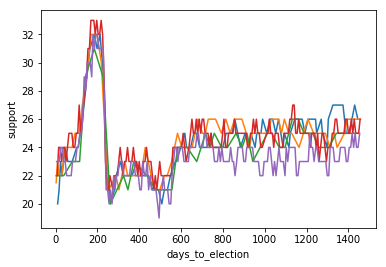

In [178]:
plot_infra_spd = sns.lineplot(x="days_to_election", y="support", data=election2017_infra_spd)
plot_fgruppe_spd = sns.lineplot(x="days_to_election", y="support", data=election2017_fgruppe_spd)
plot_gms_spd = sns.lineplot(x="days_to_election", y="support", data=election2017_gms_spd)
plot_emnid_spd = sns.lineplot(x="days_to_election", y="support", data=election2017_emnid_spd)
plot_forsa_spd = sns.lineplot(x="days_to_election", y="support", data=election2017_forsa_spd)
plot_allen_spd = sns.lineplot(x="days_to_election", y="support", data=election2017_spd)
plot_insa_spd = sns.lineplot(x="days_to_election", y="support", data=test_insaspd)

In [ ]:
election2017_infra_afd = election2017_infra.loc[election2017_infra['party'] == 'afd']
election2017_fgruppe_afd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'afd']
election2017_gms_afd = election2017_gms.loc[election2017_gms['party'] == 'afd']
election2017_emnid_afd = election2017_emnid.loc[election2017_emnid['party'] == 'afd']
election2017_forsa_afd = election2017_forsa.loc[election2017_forsa['party'] == 'afd']
election2017_allen_afd = election2017_allen.loc[election2017_allen['party'] == 'afd']
election2017_insa_afd = election2017_insa.loc[election2017_insa['party'] == 'afd']

In [ ]:
#AFD voteshares throughout the polling 

plot_infra_afd = sns.lineplot(x="days_to_election", y="support", data=election2017_infra_afd)
plot_fgruppe_afd = sns.lineplot(x="days_to_election", y="support", data=election2017_fgruppe_afd)
plot_gms_afd = sns.lineplot(x="days_to_election", y="support", data=election2017_gms_afd)
plot_emnid_afd = sns.lineplot(x="days_to_election", y="support", data=election2017_emnid_afd)
plot_forsa_afd = sns.lineplot(x="days_to_election", y="support", data=election2017_forsa_afd)
plot_allen_afd = sns.lineplot(x="days_to_election", y="support", data=election2017_allen_afd)
plot_insa_afd = sns.lineplot(x="days_to_election", y="support", data=election2017_insa_afd)

In [179]:
election2017_infra_cdu = election2017_infra.loc[election2017_infra['party'] == 'cdu']
election2017_fgruppe_cdu = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'cdu']
election2017_gms_cdu = election2017_gms.loc[election2017_gms['party'] == 'cdu']
election2017_emnid_cdu = election2017_emnid.loc[election2017_emnid['party'] == 'cdu']
election2017_forsa_cdu = election2017_forsa.loc[election2017_forsa['party'] == 'cdu']
election2017_allen_cdu = election2017_allen.loc[election2017_allen['party'] == 'cdu']
election2017_insa_cdu = election2017_insa.loc[election2017_insa['party'] == 'cdu']

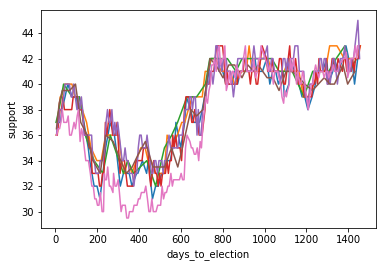

In [180]:
plot_infra_cdu = sns.lineplot(x="days_to_election", y="support", data=election2017_infra_cdu)
plot_fgruppe_cdu = sns.lineplot(x="days_to_election", y="support", data=election2017_fgruppe_cdu)
plot_gms_cdu = sns.lineplot(x="days_to_election", y="support", data=election2017_gms_cdu)
plot_emnid_cdu = sns.lineplot(x="days_to_election", y="support", data=election2017_emnid_cdu)
plot_forsa_cdu = sns.lineplot(x="days_to_election", y="support", data=election2017_forsa_cdu)
plot_allen_cdu = sns.lineplot(x="days_to_election", y="support", data=election2017_allen_cdu)
plot_insa_cdu = sns.lineplot(x="days_to_election", y="support", data=election2017_insa_cdu)

In [181]:
election2017_infra_lin = election2017_infra.loc[election2017_infra['party'] == 'lin']
election2017_fgruppe_lin = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'lin']
election2017_gms_lin = election2017_gms.loc[election2017_gms['party'] == 'lin']
election2017_emnid_lin = election2017_emnid.loc[election2017_emnid['party'] == 'lin']
election2017_forsa_lin = election2017_forsa.loc[election2017_forsa['party'] == 'lin']
election2017_allen_lin = election2017_allen.loc[election2017_allen['party'] == 'lin']
election2017_insa_lin = election2017_insa.loc[election2017_insa['party'] == 'lin']

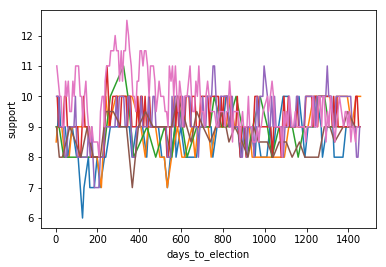

In [182]:
plot_infra_lin = sns.lineplot(x="days_to_election", y="support", data=election2017_infra_lin)
plot_fgruppe_lin = sns.lineplot(x="days_to_election", y="support", data=election2017_fgruppe_lin)
plot_gms_lin = sns.lineplot(x="days_to_election", y="support", data=election2017_gms_lin)
plot_emnid_lin = sns.lineplot(x="days_to_election", y="support", data=election2017_emnid_lin)
plot_forsa_lin = sns.lineplot(x="days_to_election", y="support", data=election2017_forsa_lin)
plot_allen_lin = sns.lineplot(x="days_to_election", y="support", data=election2017_allen_lin)
plot_insa_lin = sns.lineplot(x="days_to_election", y="support", data=election2017_insa_lin)

In [183]:
election2017_infra_gru = election2017_infra.loc[election2017_infra['party'] == 'gru']
election2017_fgruppe_gru = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'gru']
election2017_gms_gru = election2017_gms.loc[election2017_gms['party'] == 'gru']
election2017_emnid_gru = election2017_emnid.loc[election2017_emnid['party'] == 'gru']
election2017_forsa_gru = election2017_forsa.loc[election2017_forsa['party'] == 'gru']
election2017_allen_gru = election2017_allen.loc[election2017_allen['party'] == 'gru']
election2017_insa_gru = election2017_insa.loc[election2017_insa['party'] == 'gru']

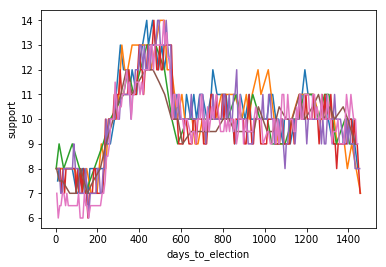

In [184]:
plot_infra_gru = sns.lineplot(x="days_to_election", y="support", data=election2017_infra_gru)
plot_fgruppe_gru = sns.lineplot(x="days_to_election", y="support", data=election2017_fgruppe_gru)
plot_gms_gru = sns.lineplot(x="days_to_election", y="support", data=election2017_gms_gru)
plot_emnid_gru = sns.lineplot(x="days_to_election", y="support", data=election2017_emnid_gru)
plot_forsa_gru = sns.lineplot(x="days_to_election", y="support", data=election2017_forsa_gru)
plot_allen_gru = sns.lineplot(x="days_to_election", y="support", data=election2017_allen_gru)
plot_insa_gru = sns.lineplot(x="days_to_election", y="support", data=election2017_insa_gru)

In [185]:
election2017_infra_oth = election2017_infra.loc[election2017_infra['party'] == 'oth']
election2017_fgruppe_oth = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'oth']
election2017_gms_oth = election2017_gms.loc[election2017_gms['party'] == 'oth']
election2017_emnid_oth = election2017_emnid.loc[election2017_emnid['party'] == 'oth']
election2017_forsa_oth = election2017_forsa.loc[election2017_forsa['party'] == 'oth']
election2017_allen_oth = election2017_allen.loc[election2017_allen['party'] == 'oth']
election2017_insa_oth = election2017_insa.loc[election2017_insa['party'] == 'oth']

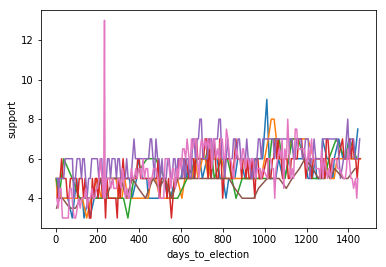

In [186]:
plot_infra_oth = sns.lineplot(x="days_to_election", y="support", data=election2017_infra_oth)
plot_fgruppe_oth = sns.lineplot(x="days_to_election", y="support", data=election2017_fgruppe_oth)
plot_gms_oth = sns.lineplot(x="days_to_election", y="support", data=election2017_gms_oth)
plot_emnid_oth = sns.lineplot(x="days_to_election", y="support", data=election2017_emnid_oth)
plot_forsa_oth = sns.lineplot(x="days_to_election", y="support", data=election2017_forsa_oth)
plot_allen_oth = sns.lineplot(x="days_to_election", y="support", data=election2017_allen_oth)
plot_insa_oth = sns.lineplot(x="days_to_election", y="support", data=election2017_insa_oth)

In [187]:
election2017_infra_fdp = election2017_infra.loc[election2017_infra['party'] == 'fdp']
election2017_fgruppe_fdp = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'fdp']
election2017_gms_fdp = election2017_gms.loc[election2017_gms['party'] == 'fdp']
election2017_emnid_fdp = election2017_emnid.loc[election2017_emnid['party'] == 'fdp']
election2017_forsa_fdp = election2017_forsa.loc[election2017_forsa['party'] == 'fdp']
election2017_allen_fdp = election2017_allen.loc[election2017_allen['party'] == 'fdp']
election2017_insa_fdp = election2017_insa.loc[election2017_insa['party'] == 'fdp']

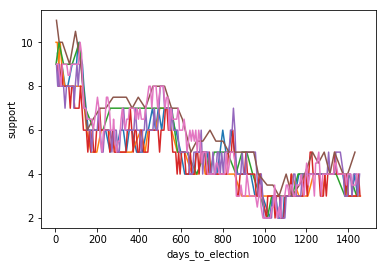

In [188]:
plot_infra_fdp = sns.lineplot(x="days_to_election", y="support", data=election2017_infra_fdp)
plot_fgruppe_fdp = sns.lineplot(x="days_to_election", y="support", data=election2017_fgruppe_fdp)
plot_gms_fdp = sns.lineplot(x="days_to_election", y="support", data=election2017_gms_fdp)
plot_emnid_fdp = sns.lineplot(x="days_to_election", y="support", data=election2017_emnid_fdp)
plot_forsa_fdp = sns.lineplot(x="days_to_election", y="support", data=election2017_forsa_fdp)
plot_allen_fdp = sns.lineplot(x="days_to_election", y="support", data=election2017_allen_fdp)
plot_insa_fdp = sns.lineplot(x="days_to_election", y="support", data=election2017_insa_fdp)

In [189]:
election2017_infra_fdp.head()
election2017_infra_fdp['date'].nunique()

KeyError: 'date'

In [190]:
upsampled_election2017_infra_fdp = election2017_infra_fdp[['date','support']]
upsampled_election2017_infra_fdp.head()

KeyError: "['date'] not in index"

In [191]:
upsampled_election2017_infra_fdp = upsampled_election2017_infra_fdp.resample('D').first()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [192]:
upsampled_election2017_infra_fdp.head()

,date,support
26400,2017-08-31,8.0
27710,2014-04-25,4.0
27711,2014-07-18,4.0
27712,2014-09-26,3.0
27713,2016-08-26,5.0
